In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv("../data/01_raw/Worst_Off_dataset.csv")

# Data Summary

In [3]:
print(df.head())

  option_type    S1    S2   K1   K2  sigma1  sigma2    q1    q2  corr     T  \
0        call  80.0  80.0  100  100     0.1     0.8  0.01  0.02   0.8  2.00   
1        call  80.0  80.0  100  100     0.4     0.1  0.02  0.05   0.5  1.00   
2        call  80.0  80.0  100  100     0.4     0.4  0.05  0.02   0.2  0.08   
3        call  80.0  80.0  100  100     0.4     0.1  0.02  0.05   0.5  1.00   
4        call  80.0  80.0  100  100     0.1     0.8  0.01  0.02   0.8  1.00   

      r     price  
0  0.01  0.262713  
1  0.10  0.098810  
2  0.10  0.003023  
3  0.05  0.039313  
4  0.05  0.106722  


In [4]:
for col in df.columns:
    print("unique values in column", col, ":\n", df[col].unique())

unique values in column option_type :
 ['call' 'put']
unique values in column S1 :
 [ 80.  85.  90.  95. 100. 105. 110. 115. 120.]
unique values in column S2 :
 [ 80.  85.  90.  95. 100. 105. 110. 115. 120.]
unique values in column K1 :
 [100]
unique values in column K2 :
 [100]
unique values in column sigma1 :
 [0.1 0.4 0.8]
unique values in column sigma2 :
 [0.8 0.1 0.4]
unique values in column q1 :
 [0.01 0.02 0.05]
unique values in column q2 :
 [0.02 0.05 0.01]
unique values in column corr :
 [0.8  0.5  0.2  0.01]
unique values in column T :
 [2.   1.   0.08 0.5  5.  ]
unique values in column r :
 [0.01  0.1   0.05  0.025]
unique values in column price :
 [2.62713009e-01 9.88103864e-02 3.02296770e-03 ... 4.73427455e+01
 3.92268363e+01 2.77879568e+01]


In [5]:
print(df.describe())

                 S1            S2         K1         K2        sigma1  \
count  1.049760e+06  1.049760e+06  1049760.0  1049760.0  1.049760e+06   
mean   1.000000e+02  1.000000e+02      100.0      100.0  4.333333e-01   
std    1.290995e+01  1.290995e+01        0.0        0.0  2.867443e-01   
min    8.000000e+01  8.000000e+01      100.0      100.0  1.000000e-01   
25%    9.000000e+01  9.000000e+01      100.0      100.0  1.000000e-01   
50%    1.000000e+02  1.000000e+02      100.0      100.0  4.000000e-01   
75%    1.100000e+02  1.100000e+02      100.0      100.0  8.000000e-01   
max    1.200000e+02  1.200000e+02      100.0      100.0  8.000000e-01   

             sigma2            q1            q2          corr             T  \
count  1.049760e+06  1.049760e+06  1.049760e+06  1.049760e+06  1.049760e+06   
mean   4.333333e-01  2.666667e-02  2.666667e-02  3.775000e-01  1.716000e+00   
std    2.867443e-01  1.699674e-02  1.699674e-02  3.000314e-01  1.762563e+00   
min    1.000000e-01  1.000

In [6]:
print(df["price"].describe())

count    1.049760e+06
mean     6.464636e+00
std      7.347176e+00
min      0.000000e+00
25%      9.494669e-01
50%      4.290630e+00
75%      9.294238e+00
max      5.956531e+01
Name: price, dtype: float64


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049760 entries, 0 to 1049759
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   option_type  1049760 non-null  object 
 1   S1           1049760 non-null  float64
 2   S2           1049760 non-null  float64
 3   K1           1049760 non-null  int64  
 4   K2           1049760 non-null  int64  
 5   sigma1       1049760 non-null  float64
 6   sigma2       1049760 non-null  float64
 7   q1           1049760 non-null  float64
 8   q2           1049760 non-null  float64
 9   corr         1049760 non-null  float64
 10  T            1049760 non-null  float64
 11  r            1049760 non-null  float64
 12  price        1049760 non-null  float64
dtypes: float64(10), int64(2), object(1)
memory usage: 104.1+ MB
None


In [8]:
df.duplicated().sum()

np.int64(0)

## Results:
Since our dataset is created manually we do not have any missing values, every column, except "option type", is numerical and well behave.

One of the good things to do is to change the object (string) type of Option type into the categorical type.
Also, since in real market (except some like FX) we usually deal with at most 2-4 digit after decimal point we are going to round this numbers to 4 digits. Because I think keeping this small values, later in training, cause some small residuals in error metrics and lead model to over-fit. (Just a gut feeling, no numerical proof.)


# Dataset Minor Cleanings

## Renaming

In [9]:
new_names = {
    "option_type": "option_type",
    "S1": "stock_price_1",
    "S2": "stock_price_2",
    "K1": "strike_price_1",
    "K2": "strike_price_2",
    "sigma1": "volatility_1",
    "sigma2": "volatility_2",
    "q1": "dividend_yield_1",
    "q2": "dividend_yield_2",
    "corr": "correlation",
    "T": "time_to_maturity",
    "r": "interest_rate",
    "price": "price",
}


df.rename(columns=new_names, inplace=True)

In [10]:
print(df.columns)

Index(['option_type', 'stock_price_1', 'stock_price_2', 'strike_price_1',
       'strike_price_2', 'volatility_1', 'volatility_2', 'dividend_yield_1',
       'dividend_yield_2', 'correlation', 'time_to_maturity', 'interest_rate',
       'price'],
      dtype='object')


## Categorical type fixing

In [11]:
df["option_type"] = df["option_type"].astype("category")

## Rounding values

In [12]:
df = df.round(4)

## Verifying Changes

In [13]:
print(df.head())

  option_type  stock_price_1  stock_price_2  strike_price_1  strike_price_2  \
0        call           80.0           80.0             100             100   
1        call           80.0           80.0             100             100   
2        call           80.0           80.0             100             100   
3        call           80.0           80.0             100             100   
4        call           80.0           80.0             100             100   

   volatility_1  volatility_2  dividend_yield_1  dividend_yield_2  \
0           0.1           0.8              0.01              0.02   
1           0.4           0.1              0.02              0.05   
2           0.4           0.4              0.05              0.02   
3           0.4           0.1              0.02              0.05   
4           0.1           0.8              0.01              0.02   

   correlation  time_to_maturity  interest_rate   price  
0          0.8              2.00           0.01  0.2

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049760 entries, 0 to 1049759
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   option_type       1049760 non-null  category
 1   stock_price_1     1049760 non-null  float64 
 2   stock_price_2     1049760 non-null  float64 
 3   strike_price_1    1049760 non-null  int64   
 4   strike_price_2    1049760 non-null  int64   
 5   volatility_1      1049760 non-null  float64 
 6   volatility_2      1049760 non-null  float64 
 7   dividend_yield_1  1049760 non-null  float64 
 8   dividend_yield_2  1049760 non-null  float64 
 9   correlation       1049760 non-null  float64 
 10  time_to_maturity  1049760 non-null  float64 
 11  interest_rate     1049760 non-null  float64 
 12  price             1049760 non-null  float64 
dtypes: category(1), float64(10), int64(2)
memory usage: 97.1 MB
None


# Exploring data visually

In [15]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["category"]).columns.tolist()
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['stock_price_1', 'stock_price_2', 'strike_price_1', 'strike_price_2', 'volatility_1', 'volatility_2', 'dividend_yield_1', 'dividend_yield_2', 'correlation', 'time_to_maturity', 'interest_rate', 'price']
Categorical columns: ['option_type']


## Exploring Distributions

I know it may look not necessary, I just wanted to do it as the standard procedure and to make sure of my data generation.

### Numerical variables

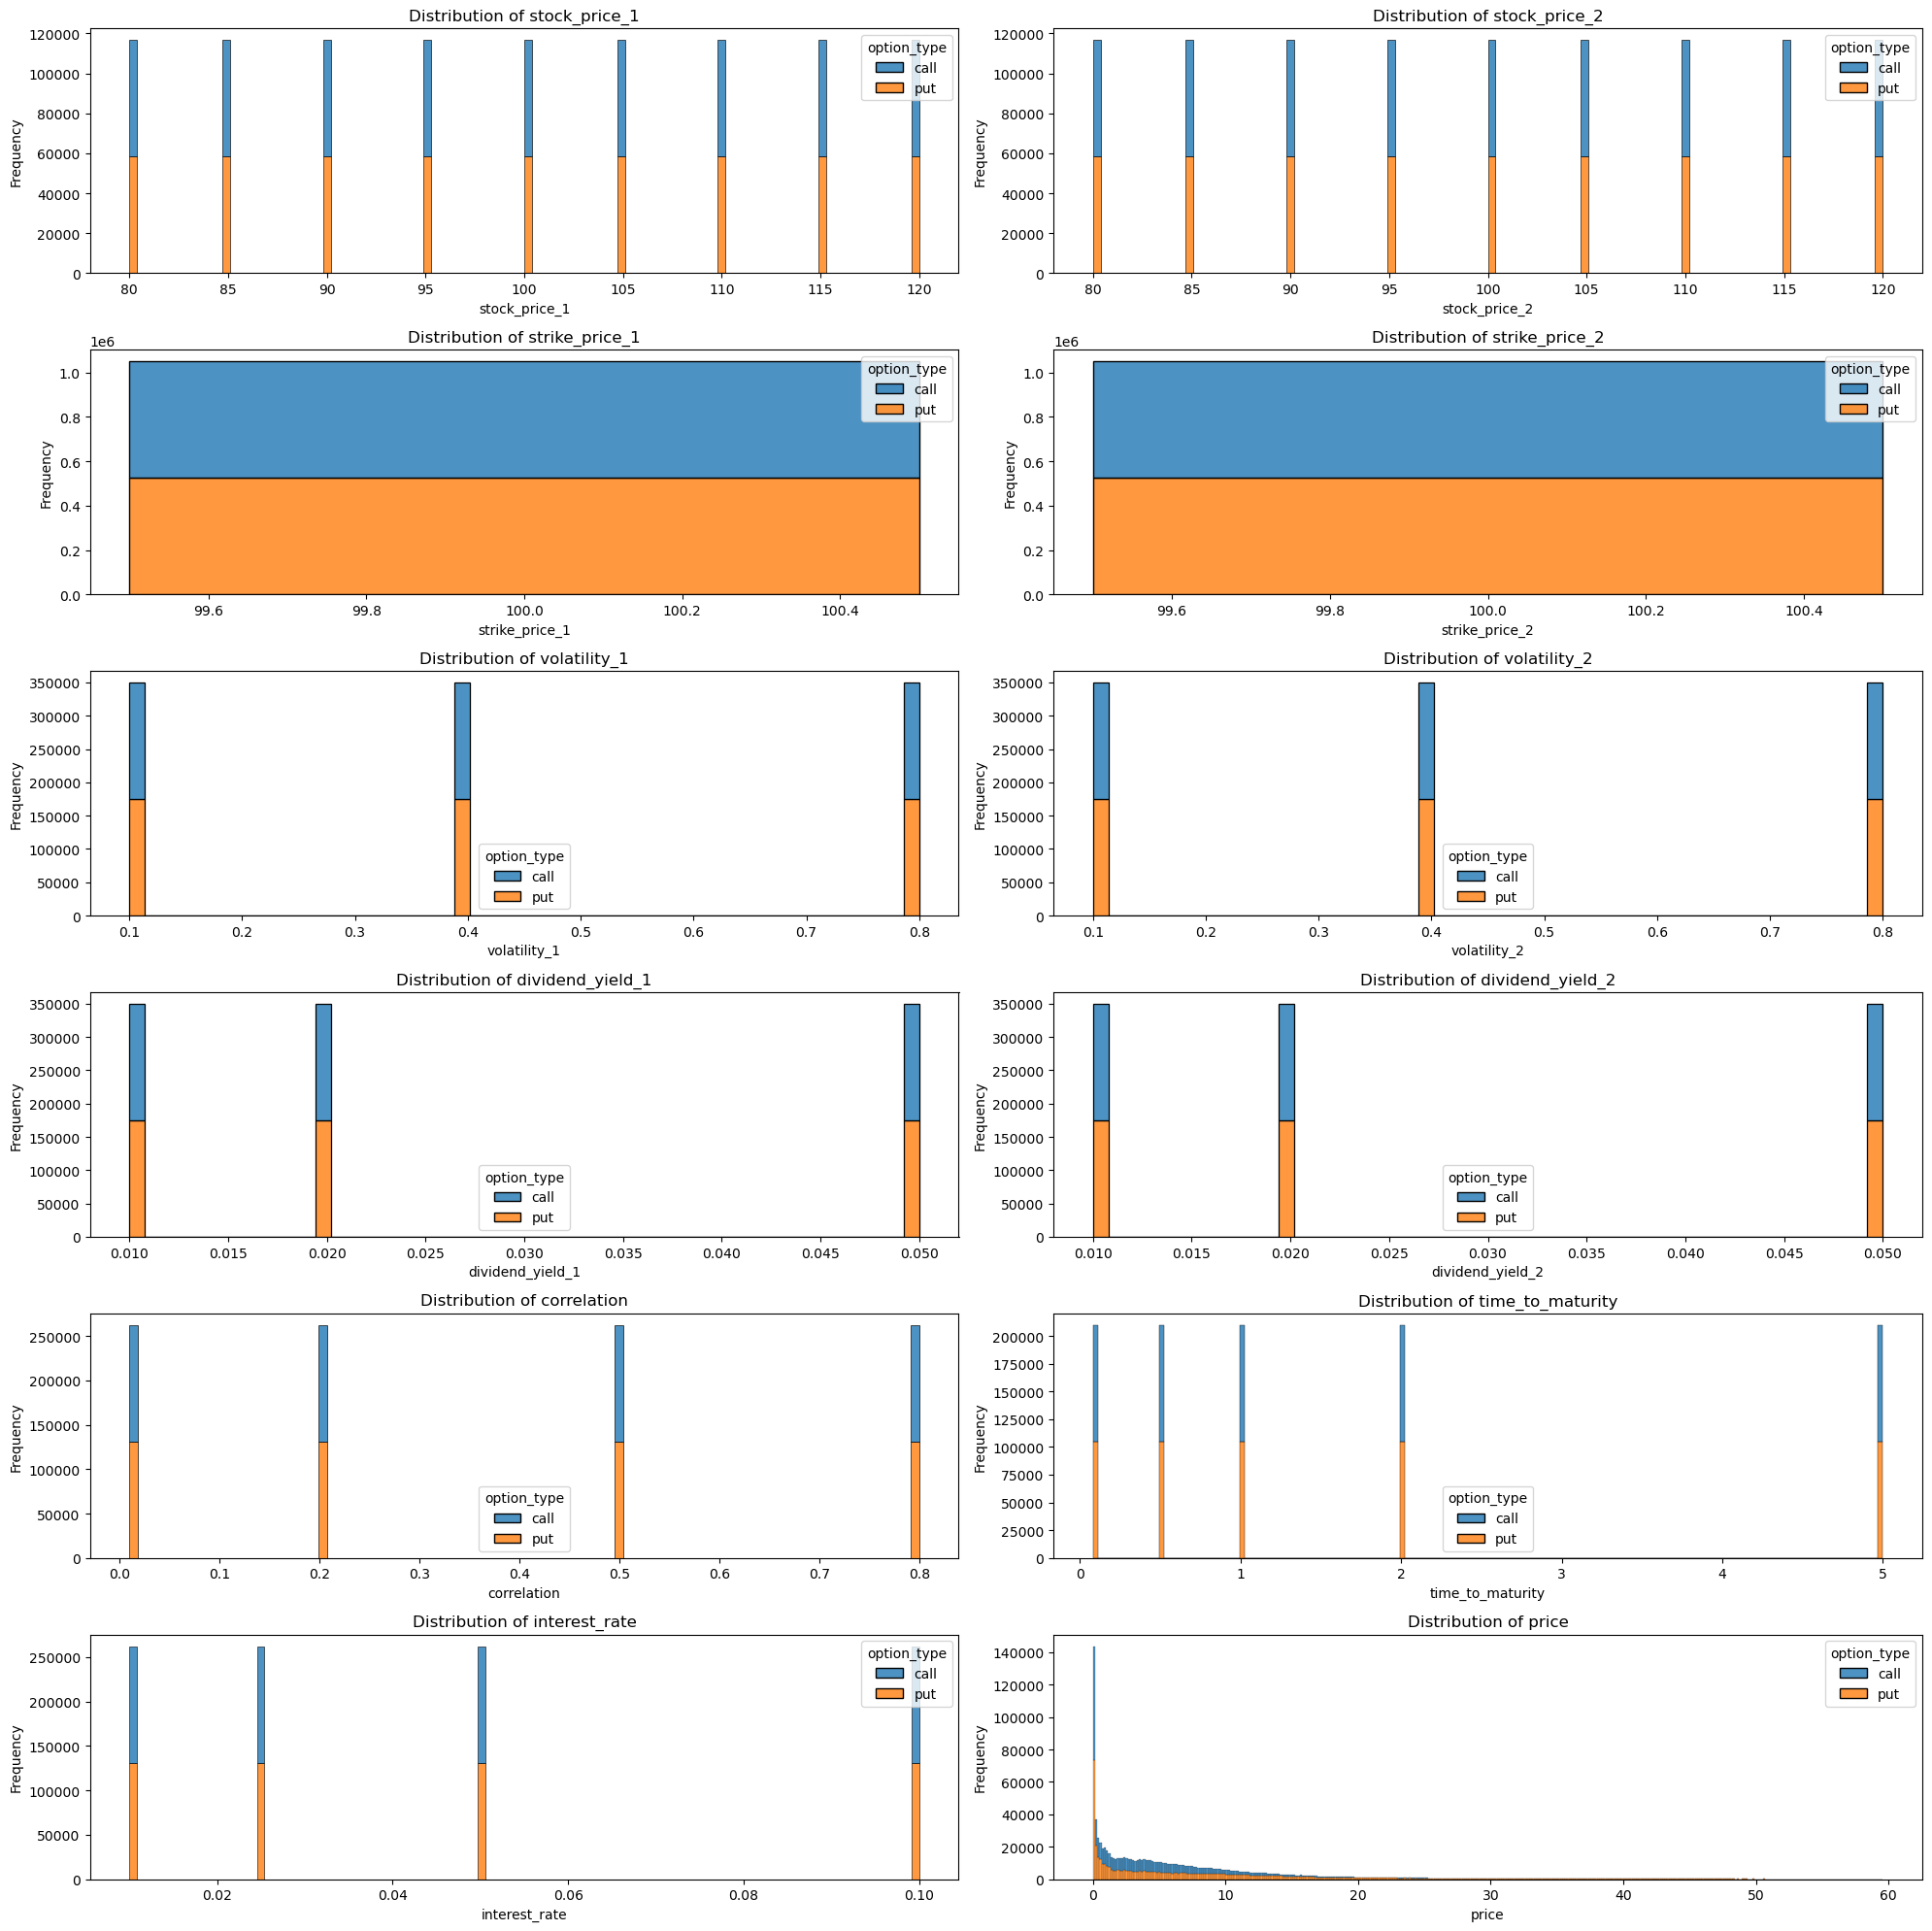

In [16]:
# making subplots for distribution of numerical variables
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(
        data=df,
        x=col,
        hue="option_type",
        multiple="stack",
        alpha=0.8,
        ax=axes[i],
    )
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

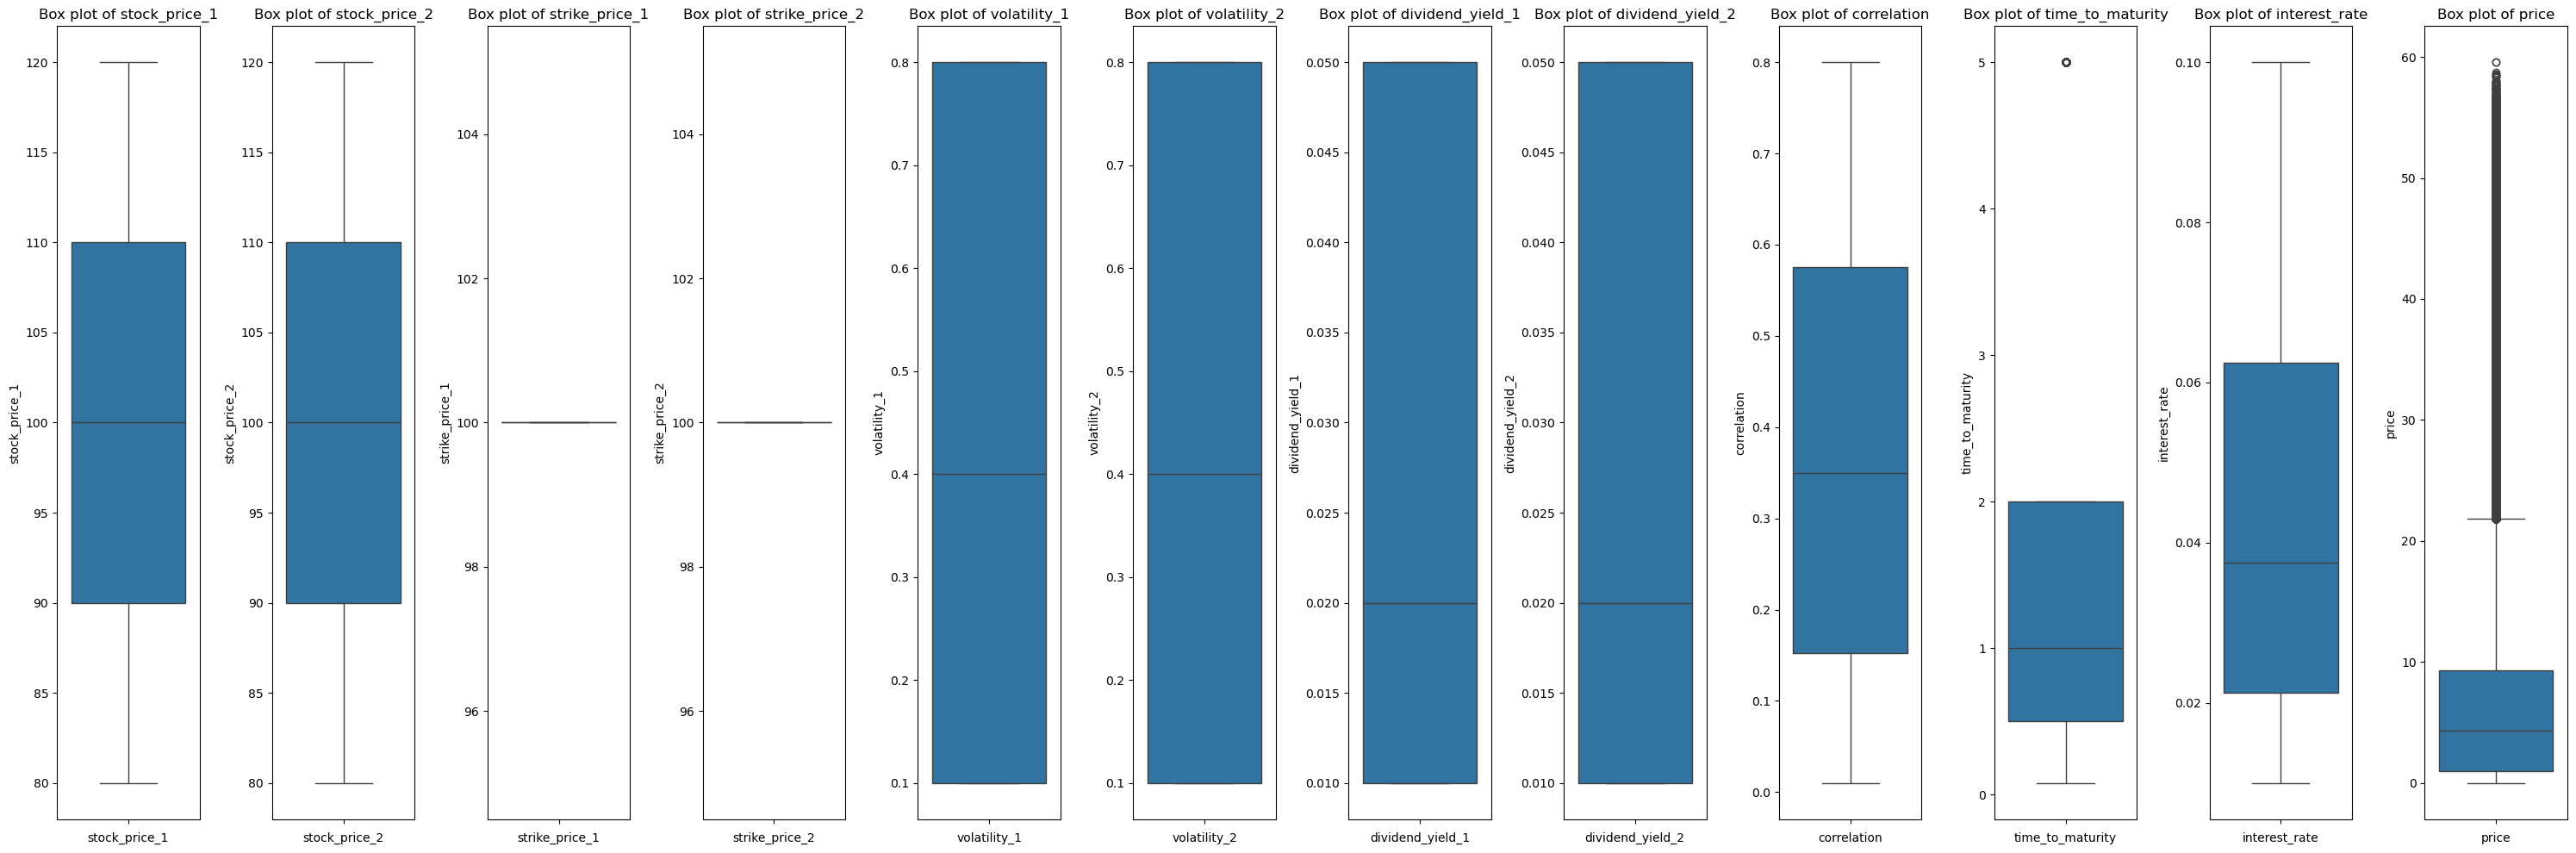

In [17]:
# making subplots for distribution of numerical variables
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(30, 10))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(f"Box plot of {col}")
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

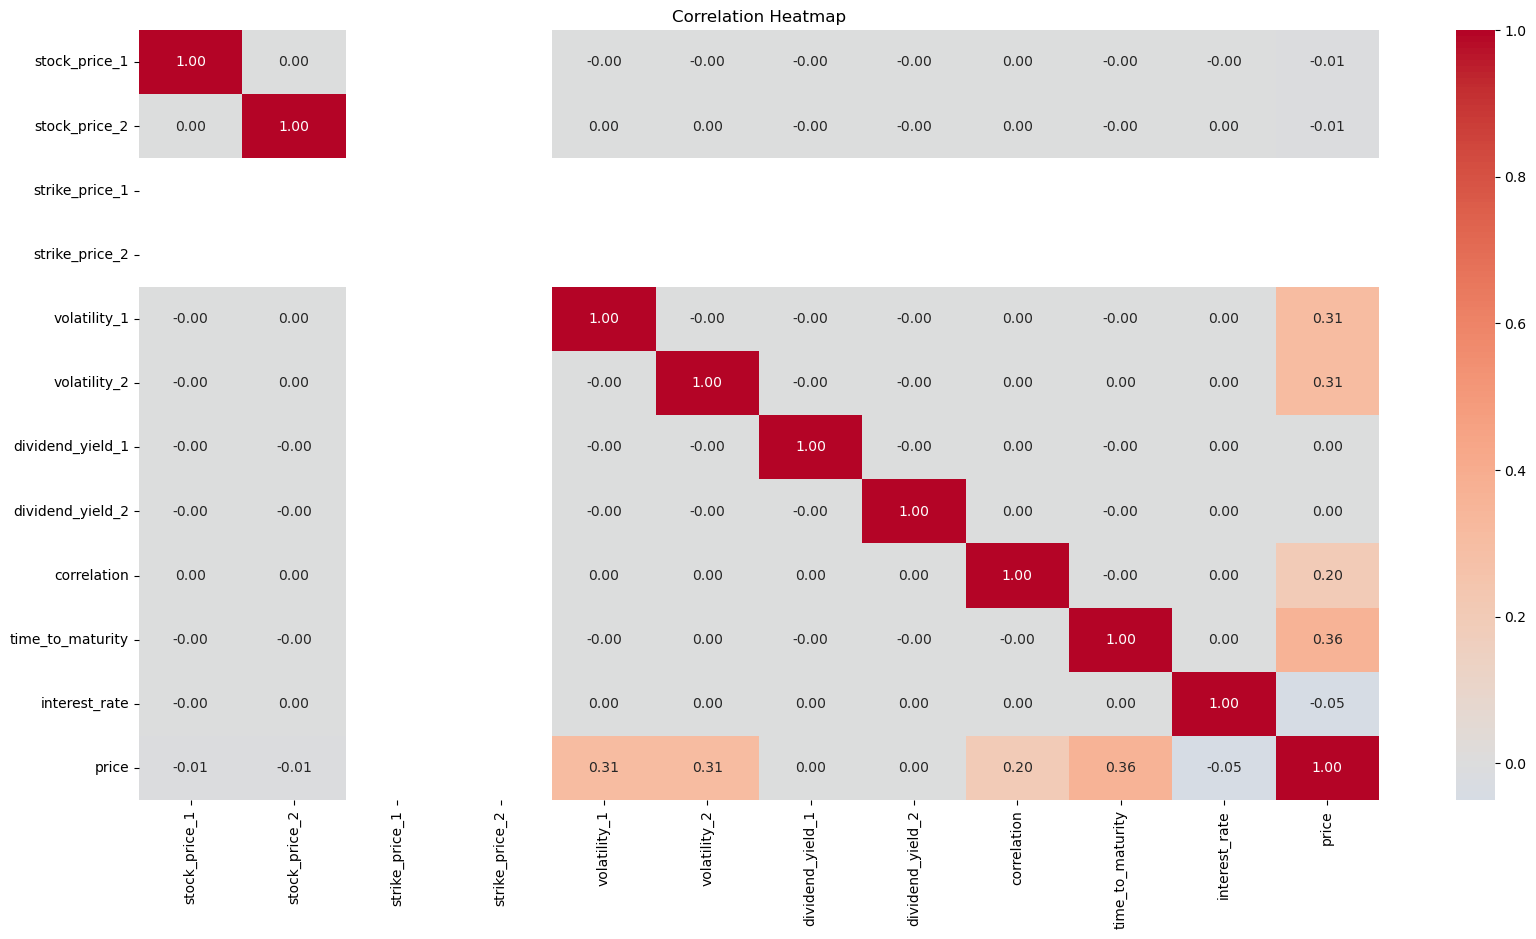

In [18]:
fig = plt.figure(figsize=(20, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

<Figure size 2000x2000 with 0 Axes>

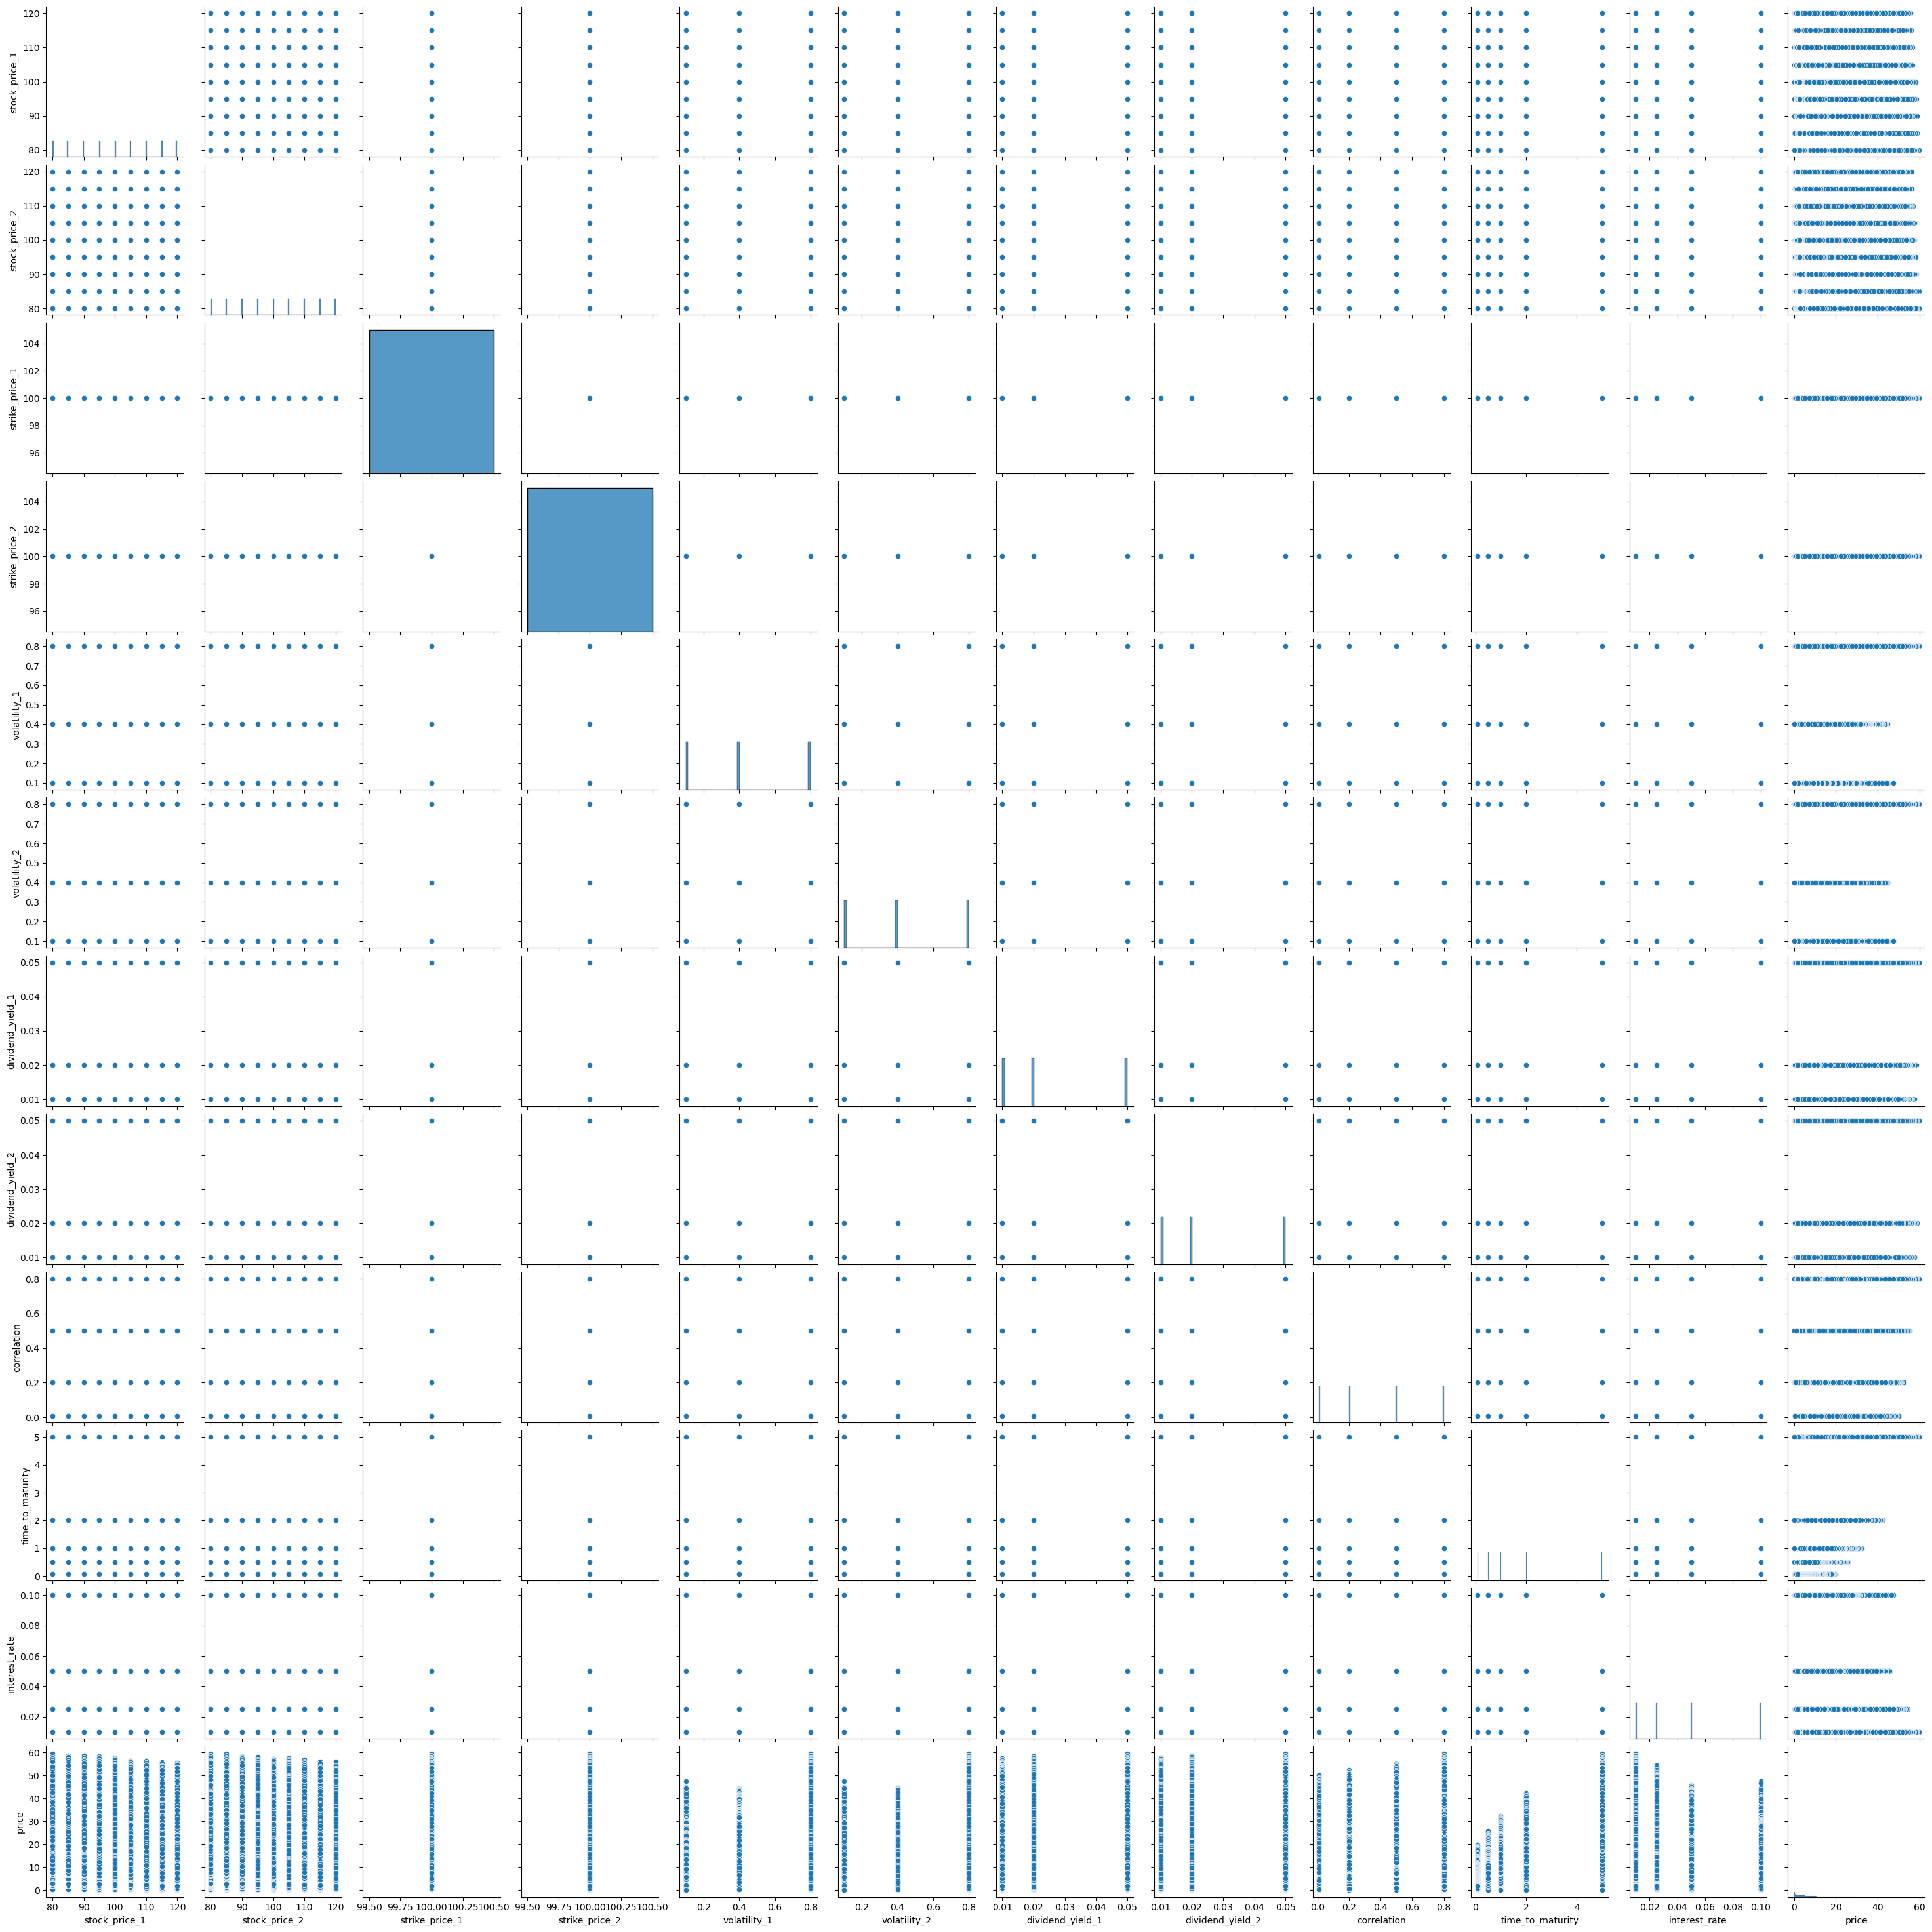

In [19]:
fig = plt.figure(figsize=(20, 20))
sns.pairplot(df)
plt.show()

### Categorical variable

<Axes: xlabel='option_type', ylabel='Count'>

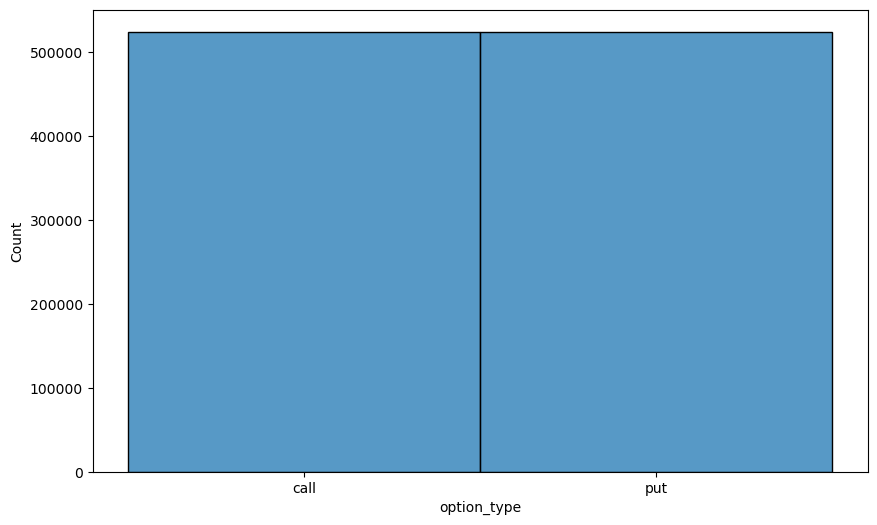

In [20]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df["option_type"])
